## Zero-Shot Industrial Defect Detection using Deep Feature Comparison

### Imports

In [1]:
import segmentation_models_pytorch as smp

from models.detector import DefectDetector
from data.loader import CaseImagePairLoader

### Model

In [2]:
model = smp.Unet(
    encoder_name='timm-resnest269e', # Model used to extract features, feel free to experiment with other models
    encoder_weights='imagenet',
    in_channels=1, # Assuming input grayscale images
    classes=1
)
detector = DefectDetector(model)

### Load Data

In [3]:
loader = CaseImagePairLoader( # Note: Images are assumed to be in .tif format and the data structure is assumed to be as follows:
                              # defective_examples/
                              #   case_1_inspected.tif
                              #   case_1_reference.tif
                              #   ...
                              # non_defective_examples/
                              #   case_1_inspected.tif
                              #   case_1_reference.tif
                              #   ...
    defective_path="defective_examples",
    non_defective_path="non_defective_examples"
)
defective_cases = loader.load_defective_image_pairs("defective")
non_defective_cases = loader.load_defective_image_pairs("non_defective")

### Defect Detection

case1:
Defect A: X=95.7, Y=81.9
Defect B: X=81.8, Y=243.8
Defect C: X=148.1, Y=333.3
case2:
Defect A: X=105.1, Y=106.3
Defect B: X=76.8, Y=259.2
Defect C: X=343.2, Y=261.9


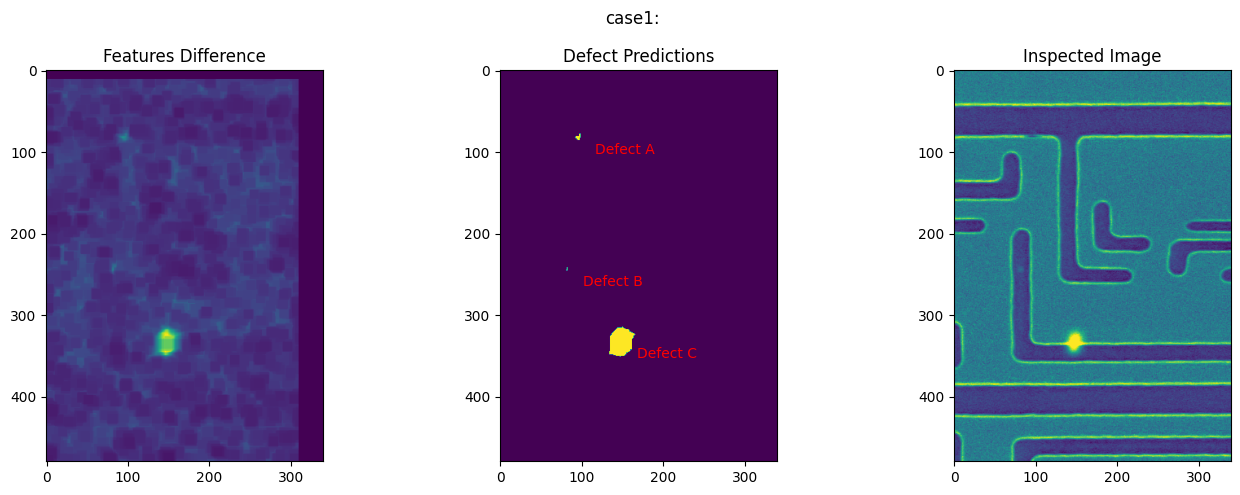

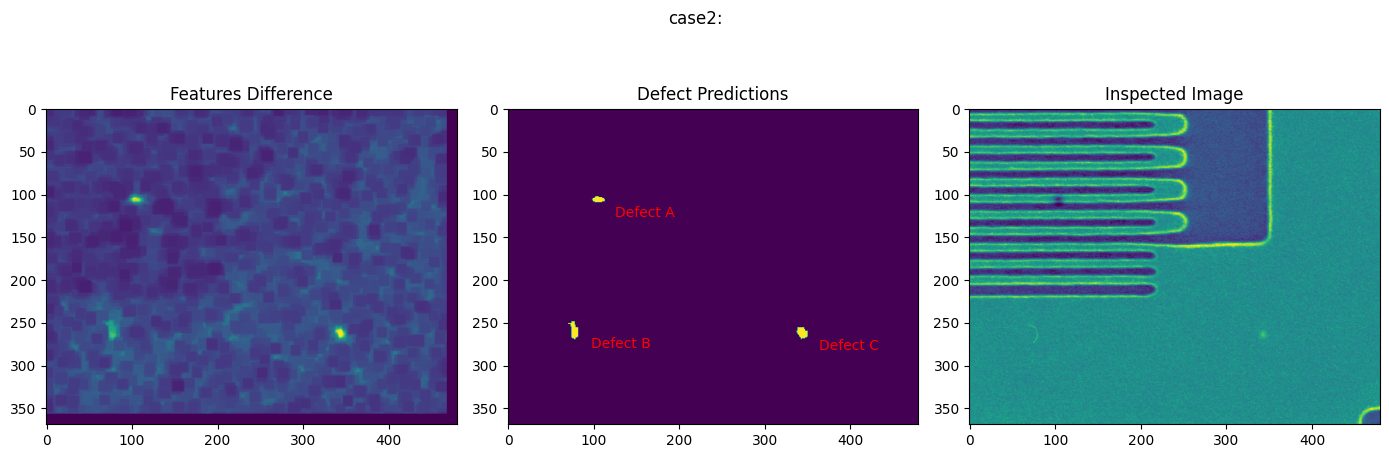

In [4]:
for case, inspected_img, reference_img in defective_cases:
    # Detect defects
    prediction_mask, centroids, feats_diff = detector.detect_defects(
        reference_img,
        inspected_img
    )
    
    # Print results
    print(f"{case}:")
    if len(centroids) > 0:
        to_char = lambda i: chr(65 + i)
        for i, (x, y) in enumerate(centroids):
            print(f"Defect {to_char(i)}: X={x:.1f}, Y={y:.1f}")
    else:
        print("No defects detected")
    
    # Visualize results
    detector.visualize_results(
        inspected_img,
        feats_diff,
        prediction_mask,
        centroids,
        case
    )